<a href="https://colab.research.google.com/github/Igli333/data-science/blob/main/Mini_Project_2_Igli_Balla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2

### Igli Balla

#### Packages and libraries installation

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

#### All imports used in this notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Importing the dataset into a Pandas DataFrame and displaying general information about it

In [ ]:
mp2 = pd.read_csv("data/MP2_Data.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

mp2.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.00000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,6.785047,0.0,0.598131,0.224299,16.88785,13.299065,1.252336,1.841121,31.728972,2.822430,0.953271,1.130841,41.915888,16.046729,1.943925,1.009346,26.074766,5.009346,1.588785,0.663551,37.607477,14.271028,2.775701,0.411215,16.355140,3.242991,1.813084,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,7.157300,0.0,1.966031,0.730836,16.30796,11.308049,1.505295,4.202761,28.686191,3.206165,2.689544,2.269919,47.164330,17.040675,2.790928,2.806648,31.159269,6.568213,3.954823,1.822003,47.851334,14.009815,7.206271,1.220526,22.242341,5.001587,4.895379,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,6.50000,10.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,4.000000,0.0,0.000000,0.000000,15.00000,11.000000,1.000000,0.000000,27.000000,4.000000,0.000000,0.000000,27.000000,15.000000,1.000000,0.000000,20.000000,4.000000,0.000000,0.000000,18.000000,15.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,12.000000,0.0,0.000000,0.000000,24.00000,19.000000,1.000000,2.000000,47.500000,4.000000,0.000000,1.000000,74.500000,27.500000,2.000000,1.000000,40.500000,6.500000,1.000000,0.000000,65.000000,25.000000,2.000000,0.000000,27.000000,5.000000,1.000000,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,27.000000,0.0,11.000000,6.000000,104.00000,57.000000,10.000000,25.000000,108.000000,15.000000,15.000000,14.000000,240.000000,87.000000,13.000000,24.000000,185.000000,39.000000,23.000000,11.000000,208.000000,51.000000,45.000000,7.000000,145.000000,24.000000,

### Visual Data Analysis
#### Distributions on features such as Grade, Mini Projects, Peer Reviews, Quizes and total scores from Week 8.


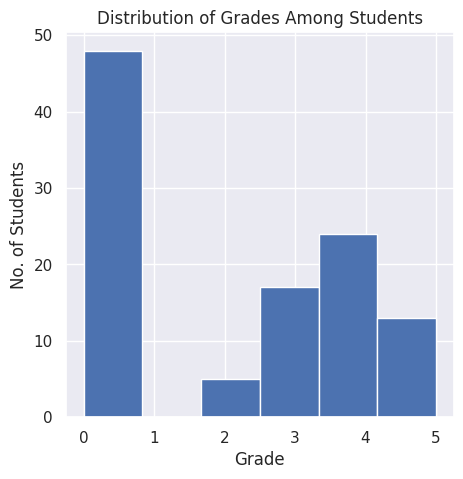

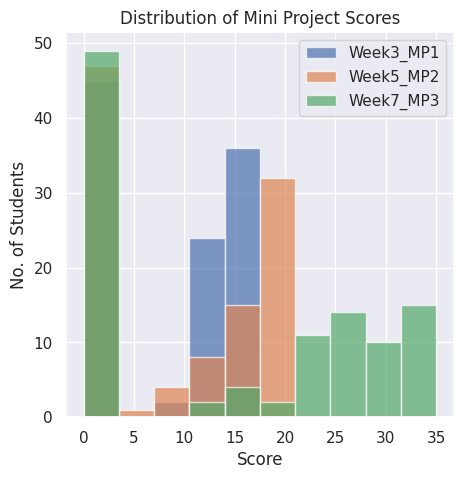

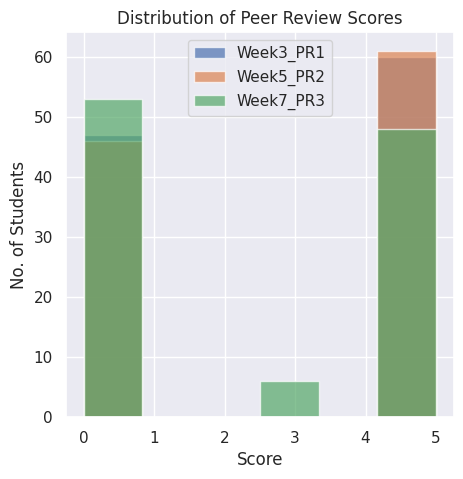

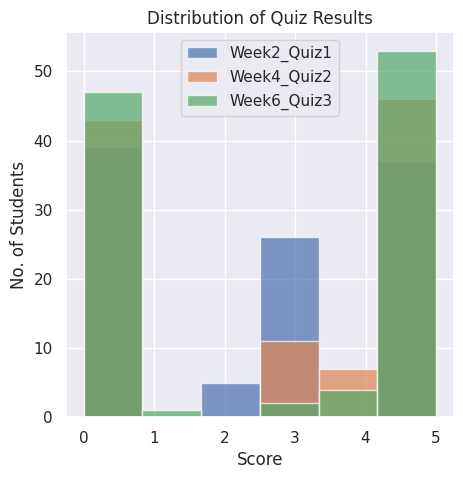

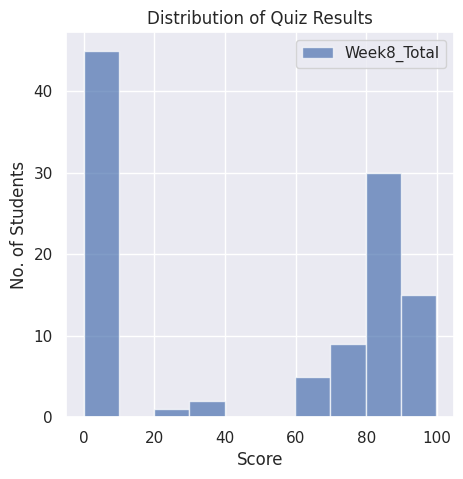

In [ ]:
sns.set_theme(rc={'figure.figsize':(5,5)})

mp2['Grade'].plot(kind='hist', bins= 6, title='Grade Distribution')
plt.title('Distribution of Grades Among Students')
plt.xlabel('Grade')
plt.ylabel('No. of Students')
plt.show()

mp2[['Week3_MP1', 'Week5_MP2', 'Week7_MP3']].plot(kind='hist', alpha=0.7, title='Mini-Project 1 Distribution')
plt.title('Distribution of Mini Project Scores')
plt.xlabel('Score')
plt.ylabel('No. of Students')
plt.show()

mp2[['Week3_PR1', 'Week5_PR2', 'Week7_PR3']].plot(kind='hist', bins=6, alpha=0.7,  title='Mini-Project 1 Distribution')
plt.title('Distribution of Peer Review Scores')
plt.xlabel('Score')
plt.ylabel('No. of Students')
plt.show()

mp2[['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3']].plot(kind='hist' , bins=6, alpha=0.7, title='Mini-Project 1 Distribution')
plt.title('Distribution of Quiz Results')
plt.xlabel('Score')
plt.ylabel('No. of Students')
plt.show()

mp2[['Week8_Total']].plot(kind='hist', alpha=0.7, title='Mini-Project 1 Distribution')
plt.title('Distribution of Quiz Results')
plt.xlabel('Score')
plt.ylabel('No. of Students')
plt.show()

### Scatter Plot of Week 8s Total Score to the final grade.

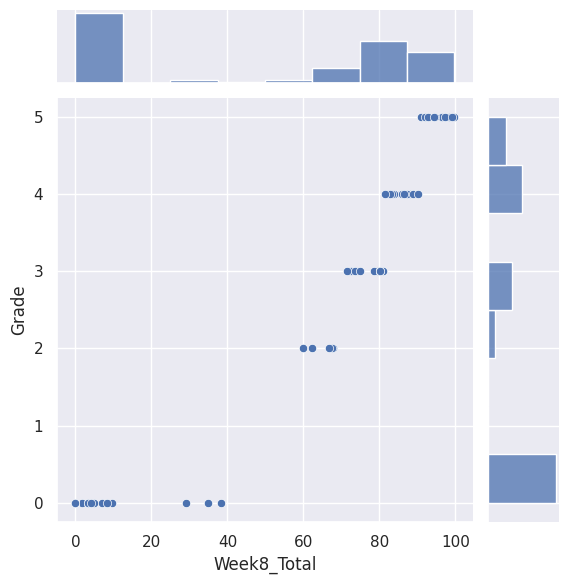

In [ ]:
sns.jointplot(x='Week8_Total', y='Grade', data=mp2, kind='scatter', height=6)
plt.show()

### Removal of non-variant 0 majority features

In [ ]:
for column in mp2.columns.tolist():
    zero_count = mp2[column].value_counts().get(0, 0)
    if zero_count/107 > 0.95:
        mp2 = mp2.drop(columns=[column])

<ipython-input-495-5f5c05759aa3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zero_count = mp2[column].value_counts().get(0, 0)


### Correlation Heatmap

<Axes: >

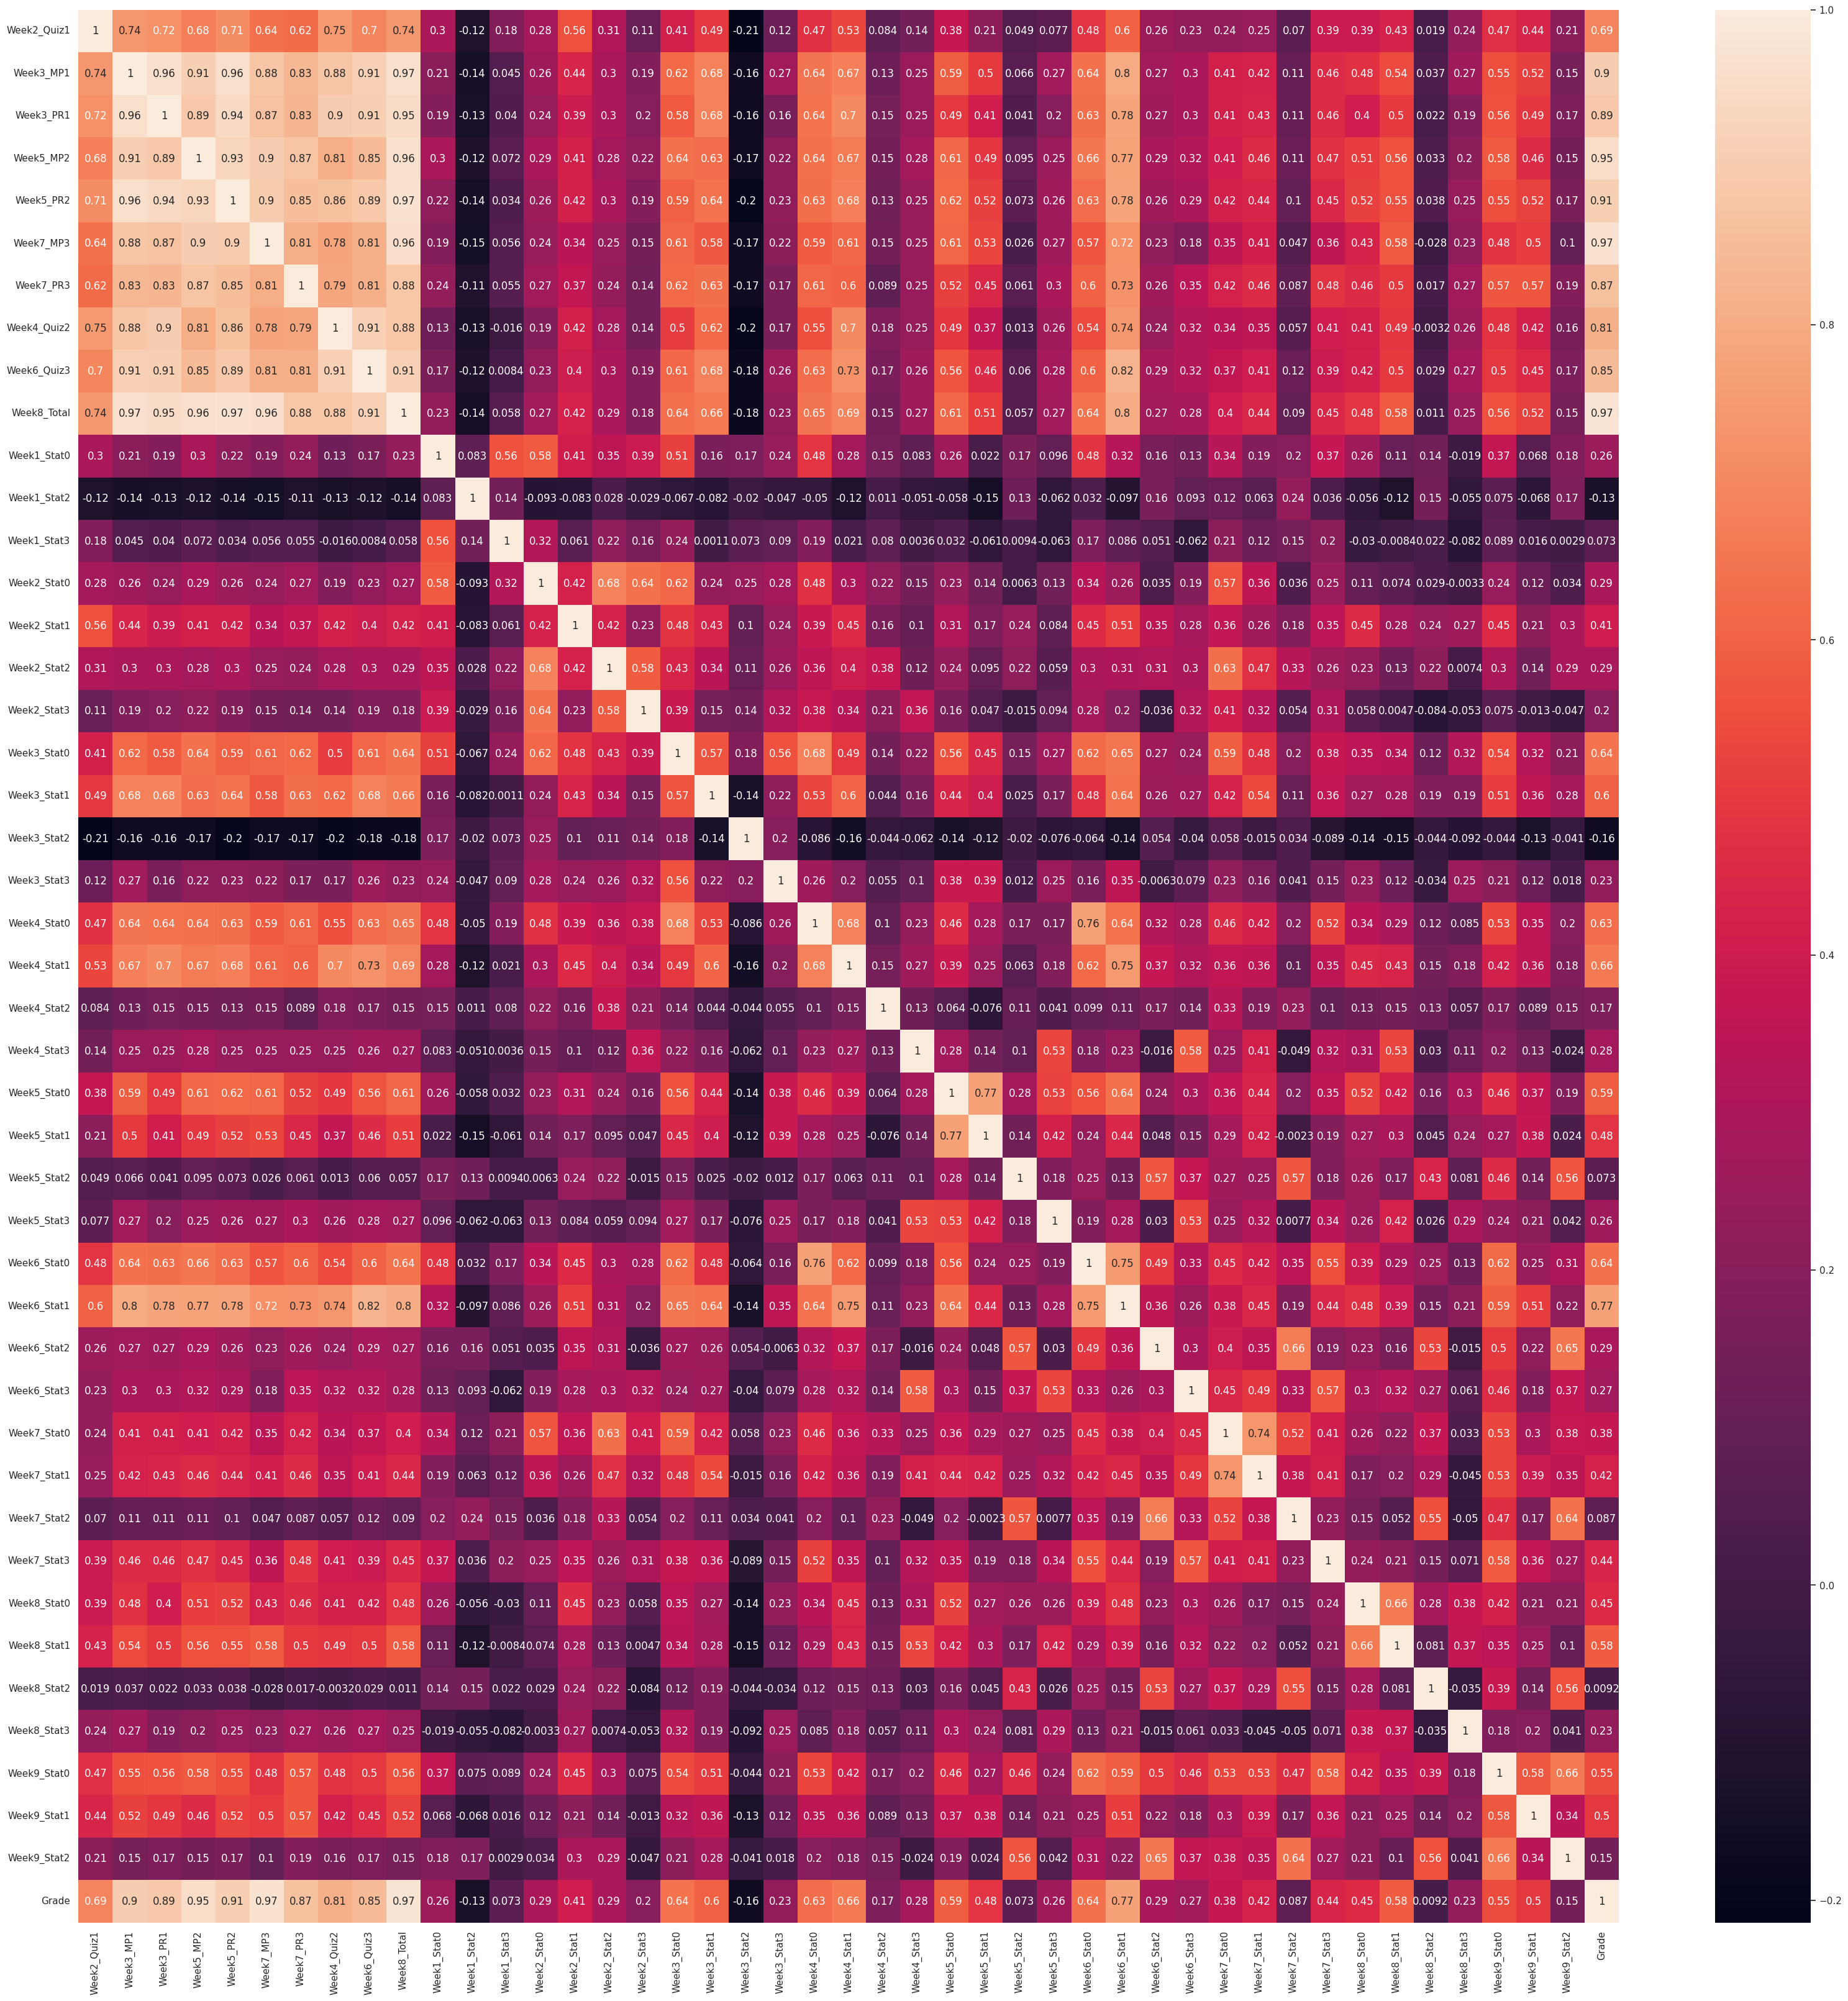

In [ ]:
corr = mp2.corr(numeric_only=True)
sns.set_theme(rc={'figure.figsize':(40,40)})
sns.heatmap(corr, annot=True)

### Removal of highly correlating features.

In [ ]:
mp2 = mp2.drop(columns=['Week3_MP1', 'Week5_MP2',
                        'Week5_PR2', 'Week7_MP3',
                        'Week8_Total', 'Week6_Quiz3',
                        'Week3_PR1', 'ID'])

### Averaging Status 3 of each week into one column.

In [ ]:
stat3_columns = mp2.filter(like='Stat3', axis=1).columns

mp2['Stat3_Average'] = mp2[stat3_columns].mean(axis=1)
mp2 = mp2.drop(columns=stat3_columns)

### Removal of features by model training tweaking.

In [ ]:
mp2 = mp2.drop(columns=['Week4_Stat2', 'Week2_Stat2', 'Week2_Stat0', 'Week6_Stat2'])

### Split of dataset into train and test sets.

In [ ]:
X = mp2.drop('Grade', axis=1)
y = mp2['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=42)

### Random Forest Model Training

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Model Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Performance Metrics:
Accuracy: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           4       0.83      0.83      0.83         6

    accuracy                           0.86        14
   macro avg       0.58      0.71      0.62        14
weighted avg       0.82      0.86      0.83        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Random Forest Result Analysis and Visualisation

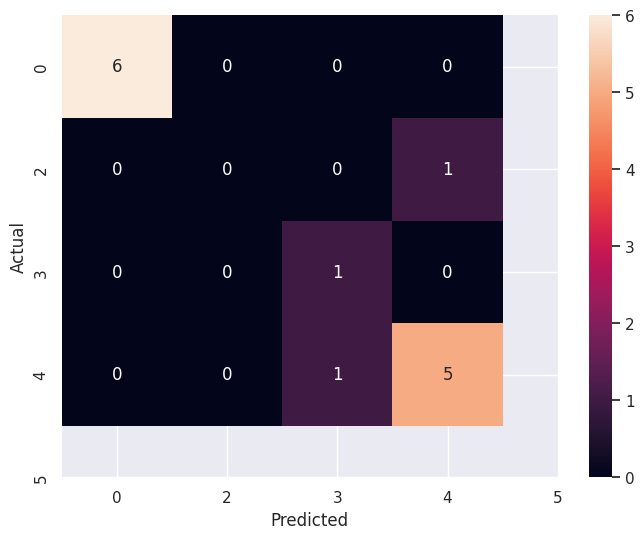

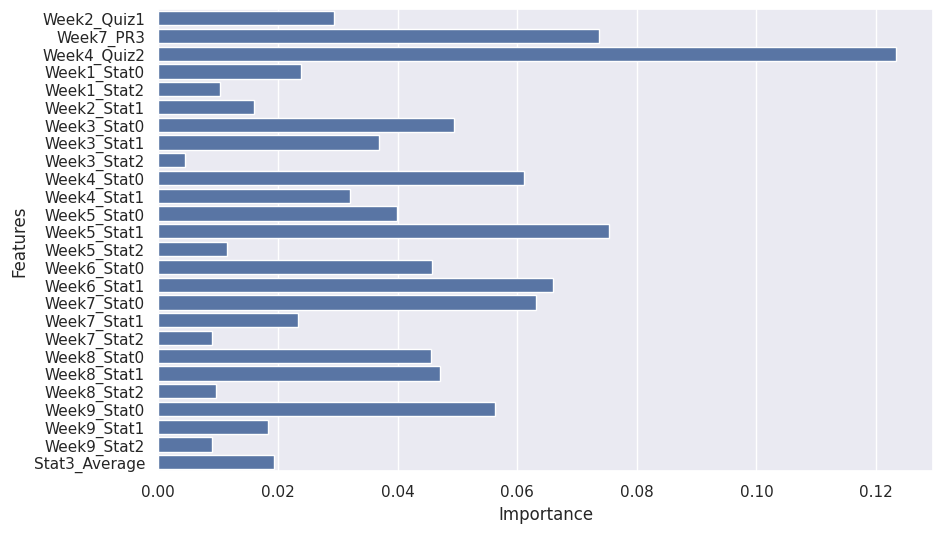

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

#### Random Forest Validation

In [ ]:
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", rf_cv_scores)
print("Mean Cross-Validation Mean Accuracy:", np.mean(rf_cv_scores))

Cross-Validation Accuracy Scores: [0.54545455 0.68181818 0.71428571 0.80952381 0.57142857]
Mean Cross-Validation Mean Accuracy: 0.6645021645021645


### Support Vector Machine Model

In [ ]:
svm_clf = SVC(gamma='scale', decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

print("SVM Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Performance Metrics:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.80      0.67      0.73         6

    accuracy                           0.71        14
   macro avg       0.41      0.42      0.41        14
weighted avg       0.71      0.71      0.71        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### SVM Result Visualisation

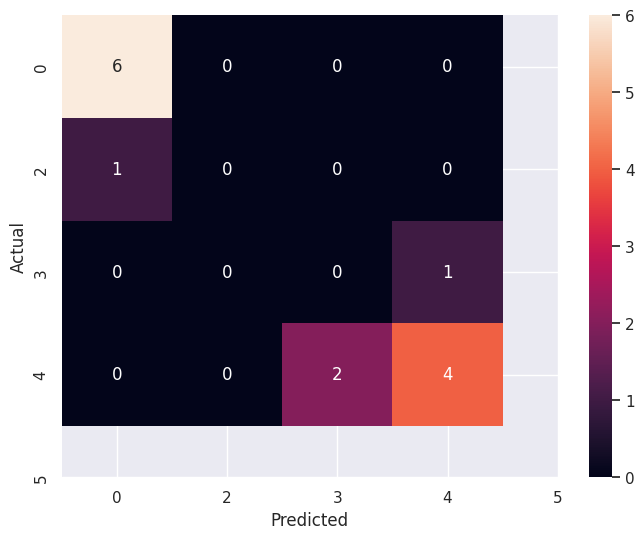

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### SVM Validation  

In [ ]:
svm_clf_cv_scores = cross_val_score(svm_clf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", svm_clf_cv_scores)
print("Cross-Validation Mean Accuracy:", np.mean(svm_clf_cv_scores))

Cross-Validation Accuracy Scores: [0.59090909 0.63636364 0.61904762 0.66666667 0.52380952]
Cross-Validation Mean Accuracy: 0.6073593073593073
